In [37]:
# IMPORTANDO AS BIBLIOTECAS NECESSÁRIAS

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

PRIMEIRAS LINHAS DA SERIES FEATURES
0    1 tBodyAcc-mean()-X
1    2 tBodyAcc-mean()-Y
2    3 tBodyAcc-mean()-Z
3     4 tBodyAcc-std()-X
4     5 tBodyAcc-std()-Y
dtype: object
--------------------------------------------------------------------------------
PRIMEIRAS LINHAS DA SERIES SUBJECT_TRAIN
0    1
1    1
2    1
3    1
4    1
dtype: object
--------------------------------------------------------------------------------
PRIMEIRAS LINHAS DO DATAFRAME X_TRAIN
           1 tBodyAcc-mean()-X  2 tBodyAcc-mean()-Y  3 tBodyAcc-mean()-Z  \
  Subject                                                                  
0 1                   0.288585            -0.020294            -0.132905   
1 1                   0.278419            -0.016411            -0.123520   
2 1                   0.279653            -0.019467            -0.113462   
3 1                   0.279174            -0.026201            -0.123283   
4 1                   0.276629            -0.016570            -0.115362   

  

PRIMEIRAS LINHAS DO DATAFRAME X_TRAIN RESULTANTE
           1 tBodyAcc-mean()-X  2 tBodyAcc-mean()-Y  3 tBodyAcc-mean()-Z  \
  Subject                                                                  
0 1                   0.288585            -0.020294            -0.132905   
1 1                   0.278419            -0.016411            -0.123520   
2 1                   0.279653            -0.019467            -0.113462   
3 1                   0.279174            -0.026201            -0.123283   
4 1                   0.276629            -0.016570            -0.115362   

           4 tBodyAcc-std()-X  5 tBodyAcc-std()-Y  6 tBodyAcc-std()-Z  
  Subject                                                              
0 1                 -0.995279           -0.983111           -0.913526  
1 1                 -0.998245           -0.975300           -0.960322  
2 1                 -0.995380           -0.967187           -0.978944  
3 1                 -0.996091           -0.983403         

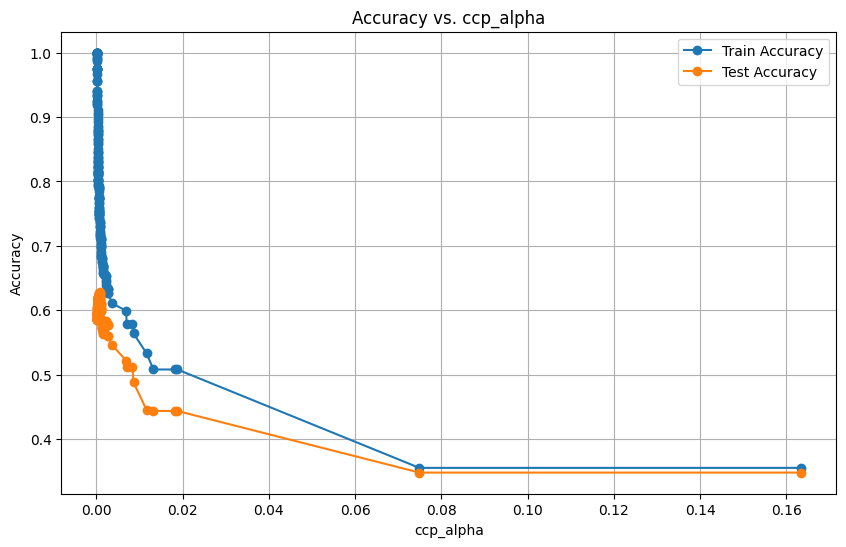

Melhor Árvore (ccp_alpha=0.0007237804775698069): Acurácia na Base de Teste = 0.6281
CPU times: total: 33.3 s
Wall time: 34.5 s


In [11]:
%%time

# FUNÇÃO QUE RECEBE O CAMINHO DO ARQUIVO COMO ARGUMENTO E RETORNA A SERIES COM OS DADOS LIDOS

def read_file_to_series(file_path, dtype=None):
    
    # LISTA PARA ARMAZENAR OS VALORES LIDOS DO ARQUIVO
    values = []  
    # ABRE O ARQUIVO PARA LEITURA
    with open(file_path, "r") as file:  
        # ITERA SOBRE CADA LINHA DO ARQUIVO
        for line in file:  
            # REMOVE ESPAÇOS EM BRANCO E QUEBRAS DE LINHA DA LINHA
            value = line.strip()  
            # VERIFICA SE O TIPO DE DADO FOI FORNECIDO
            if dtype is not None:  
                # CONVERTE O VALOR PARA O TIPO ESPECIFICADO PELO DTYPE
                value = dtype(value)  
            # ADICIONA O VALOR À LISTA DE VALORES
            values.append(value)  
    # CRIA UMA SERIES A PARTIR DA LISTA DE VALORES
    series = pd.Series(values)  
    # RETORNA A SERIES COM OS DADOS LIDOS DO ARQUIVO
    return series  

"""
COMANDO PD.READ_CSV() RETORNA ERRO DE DIVERSAS MANEIRAS E NÃO ACEITA SER UTILIZADO NESTE ARQUIVO PARA TRANSFORMAR 
EM UMA SERIES, POR ISSO OPTEI POR FAZER DESTA MANEIRA.
"""

# CARREGANDO A BASE FEATURES.TXT E TRANSFORMANDO EM UMA SERIES ATRAVÉS DA FUNÇÃO READ_FILE_TO_SERIES
features_path = "./data/features.txt"
features_series = read_file_to_series(features_path)

# PRINTANDO AS PRIMEIRAS LINHAS DA SERIES
print("PRIMEIRAS LINHAS DA SERIES FEATURES")
print(features_series.head())
print("-"*80)

# CARREGANDO A BASE SUBJECT_TRAIN.TXT E TRANSFORMANDO EM UMA SERIES ATRAVÉS DA FUNÇÃO READ_FILE_TO_SERIES
subject_train_path = "./data/train/subject_train.txt"
subject_train_series = read_file_to_series(subject_train_path)

# PRINTANDO AS PRIMEIRAS LINHAS DA SERIES
print("PRIMEIRAS LINHAS DA SERIES SUBJECT_TRAIN")
print(subject_train_series.head())
print("-"*80)

# CARREGANDO A BASE SUBJECT_TRAIN.TXT E TRANSFORMANDO-O EM UM DATAFRAME
X_train_path = "./data/train/X_train.txt"
X_train = pd.read_csv(X_train_path, sep='\s+', header=None)

# ATRIBUIR OS NOMES DAS COLUNAS DO DATAFRAME X_TRAIN COM BASE NA SERIES FEATURES_SERIES
X_train.columns = features_series

# ADICIONAR O IDENTIFICADOR DO INDIVÍDUO COMO COLUNA NO DATAFRAME X_TRAIN
X_train["Subject"] = subject_train_series

# CRIAR UM ÍNDICE DUPLO COM A ORDEM DOS DADOS E O IDENTIFICADOR DO INDIVÍDUO
X_train.set_index([X_train.index, "Subject"], inplace=True)

# PRINTAR AS PRIMEIRAS LINHAS DO DATAFRAME RESULTANTE
print("PRIMEIRAS LINHAS DO DATAFRAME X_TRAIN")
print(X_train.head())
print("-"*80)

# CAMINHO PARA O ARQUIVO X_TEST.TXT
X_test_path = "./data/test/X_test.txt"

# CARREGANDO OS DADOS DE TESTE EM UM DATAFRAME
X_test = pd.read_csv(X_test_path, sep='\s+', header=None)

# ATRIBUINDO OS NOMES DAS COLUNAS DO DATAFRAME X_TEST COM BASE NA SERIES FEATURES_SERIES
X_test.columns = features_series

# CAMINHO PARA O ARQUIVO SUBJECT_TEST.TXT
subject_test_path = "./data/test/subject_test.txt"

# CARREGAR OS IDENTIFICADORES DOS INDIVÍDUOS NA BASE DE TESTE EM UMA SERIES
subject_test_series = read_file_to_series(subject_test_path)

# ADICIONAR O IDENTIFICADOR DO INDIVÍDUO COMO COLUNA NO DATAFRAME X_TEST
X_test["Subject"] = subject_test_series

# CRIANDO UM ÍNDICE DUPLO COM A ORDEM DOS DADOS E O IDENTIFICADOR DO INDIVÍDUO
X_test.set_index([X_test.index, "Subject"], inplace=True)

# PRINTANDO AS PRIMEIRAS LINHAS DO DATAFRAME RESULTANTE
print("PRIMEIRAS LINHAS DO DATAFRAME X_TEST")
print(X_test.head())
print("-"*80)

# SALVANDO OS DADOS DE TREINO EM UM ARQIVO CSV

X_train.to_csv("./data/train/X_train_processed.csv")

# SALVAR OS DADOS DE TESTE EM UM ARQUIVO CSV
X_test.to_csv("./data/test/X_test_processed.csv")


# SELECIONAR APENAS AS TRÊS PRIMEIRAS COLUNAS DO DATAFRAME X_TRAIN 
# ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z']
# X_train = X_train.iloc[:, :3]
X_train = X_train.iloc[:, :6]

# PRINTAR AS PRIMEIRAS LINHAS DO DATAFRAME RESULTANTE
print("PRIMEIRAS LINHAS DO DATAFRAME X_TRAIN RESULTANTE")
print(X_train.head())
print("-"*80)


# CARREGANDO A BASE Y_TRAIN.TXT E TRANSFORMANDO-O EM UM DATAFRAME
y_train_path = "./data/train/y_train.txt"
y_train = pd.read_csv(y_train_path, sep='\s+', header=None)

# SELECIONANDO APENAS AS 3 VARIÁVEIS INDICADAS NO DATAFRAME X_TRAIN
# X_train_selected = X_train.iloc[:, :3]
X_train_selected = X_train.iloc[:, :6]


# CRIANDO O MODELO DE ÁRVORE DE DECISÃO COM O NÚMERO MÍNIMO DE OBSERVAÇÕES POR FOLHA IGUAL A 20
tree_model = DecisionTreeClassifier(min_samples_leaf=20, random_state=42)

# AJUSTANDO O MODELO AOS DADOS DE TREINO
tree_model.fit(X_train_selected, y_train) 

# CALCULANDO OS CCP_ALPHAS PARA A ÁRVORE DE DECISÃO AJUSTADA

ccp_alphas = tree_model.cost_complexity_pruning_path(X_train_selected, y_train)['ccp_alphas']

# REMOVENDO VALORES NÃO POSITIVOS

ccp_alphas = ccp_alphas[ccp_alphas > 0]

# SELECIONANDO APENAS VALORES ÚNICOS

ccp_alphas = np.unique(ccp_alphas)

# CRIANDO A COLEÇÃO DE DADOS COM OS CCP_ALPHAS CONSIDERANDO 1 A CADA 5 VALORES

#ccp_alphas_collection = ccp_alphas[::5]
ccp_alphas_collection = ccp_alphas[::1]


# CRIANDO UMA LISTA PARA ARMAZENAR AS ÁRVORES

tree_list = []

# LOOP PARA AJUSTAR ÁRVORES PARA DIFERENTES VALORES DE CCP_ALPHA

for alpha in ccp_alphas_collection:
    tree_model = DecisionTreeClassifier(ccp_alpha=alpha, random_state=42)
    tree_model.fit(X_train_selected, y_train)
    tree_list.append(tree_model)

# CARREGANDO OS DADOS DE TESTE PARA Y_TEST

y_test_path = "./data/test/y_test.txt"
y_test = pd.read_csv(y_test_path, sep='\s+', header=None)

# CALCULANDO AS ACURÁCIAS DOS MODELOS DE ÁRVORE DE DECISÃO NOS DADOS DE TREINO E TESTE

train_accuracies = []
test_accuracies = []

for tree_model in tree_list:
    train_predictions = tree_model.predict(X_train_selected)
    #test_predictions = tree_model.predict(X_test.iloc[:, :3])
    test_predictions = tree_model.predict(X_test.iloc[:, :6])
    
    train_accuracy = accuracy_score(y_train, train_predictions)
    test_accuracy = accuracy_score(y_test, test_predictions)
    
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# CRIANDO UM GRÁFICO PARA VISUALIZAR A RELAÇÃO ENTRE OS VALORES DE CCP_ALPHA E AS ACURÁCIAS NOS DADOS DE TREINO E TESTE

plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas_collection, train_accuracies, marker='o', label='Train Accuracy')
plt.plot(ccp_alphas_collection, test_accuracies, marker='o', label='Test Accuracy')
plt.xlabel('ccp_alpha')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. ccp_alpha')
plt.legend()
plt.grid(True)
plt.show()

# DETERMINANDO QUAL É A MELHOR ÁRVORE DE DECISÃO EM TERMOS DE ACURÁCIA NOS DADOS DE TESTE

best_tree_index = test_accuracies.index(max(test_accuracies))
best_tree = tree_list[best_tree_index]
best_test_accuracy = test_accuracies[best_tree_index]
print(f"Melhor Árvore (ccp_alpha={ccp_alphas_collection[best_tree_index]}): Acurácia na Base de Teste = {best_test_accuracy:.4f}")

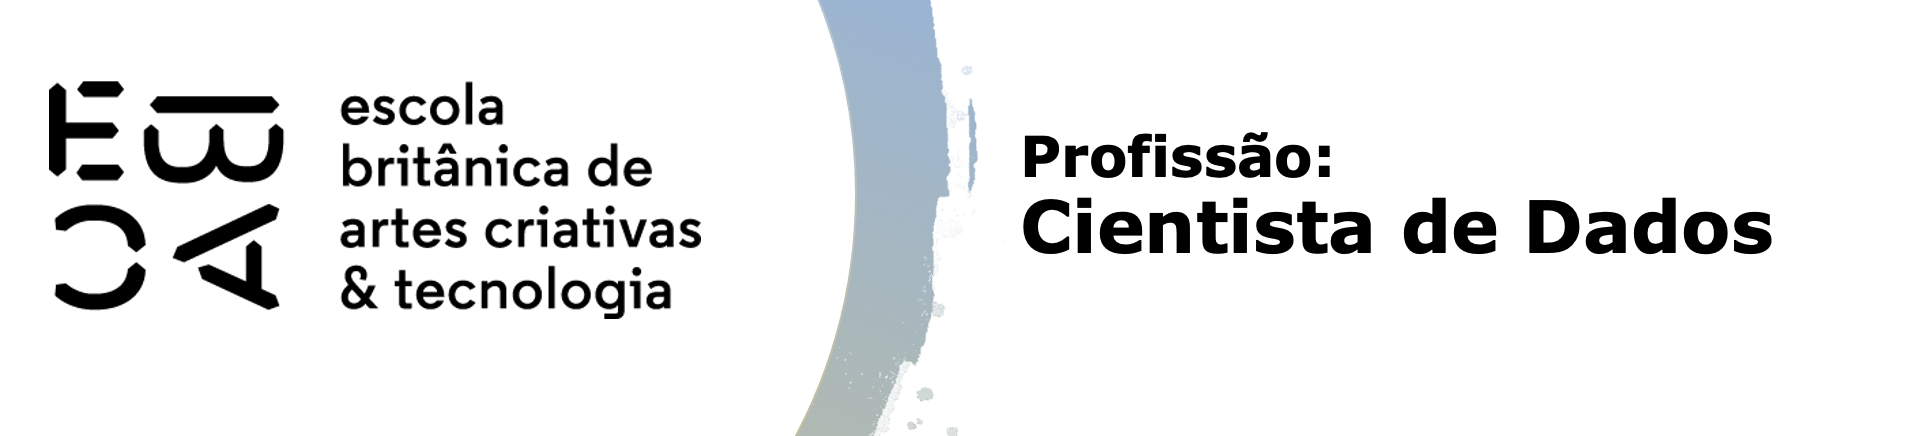

# Árvores II - Tarefa 3

### 1. Carregar as bases

Vamos utilizar nesta tarefa as bases de reconhecimento de atividade humana através do celular. Carregue novamente as bases salvas na tarefa I.

In [12]:
# CARREGANDO AS BASES LIDAS NA TAREFA ANTERIOR

# CARREGANDO A BASE X_TRAIN.TXT E TRANSFORMANDO-O EM UM DATAFRAME
X_train_path = "./data/train/X_train.txt"
X_train = pd.read_csv(X_train_path, sep='\s+', header=None)

# CARREGANDO A BASE Y_TRAIN.TXT E TRANSFORMANDO-O EM UM DATAFRAME
y_train_path = "./data/train/y_train.txt"
y_train = pd.read_csv(y_train_path, sep='\s+', header=None)

# CARREGANDO A BASE X_TEST.TXT E TRANSFORMANDO-O EM UM DATAFRAME
X_test_path = "./data/test/X_test.txt"
X_test = pd.read_csv(X_test_path, sep='\s+', header=None)

# CARREGANDO A BASE Y_TEST.TXT E TRANSFORMANDO-O EM UM DATAFRAME
y_test_path = "./data/test/y_test.txt"
y_test = pd.read_csv(y_test_path, sep='\s+', header=None)

### 2. Calcule os ```ccp_alphas```. 

Vamos seguir uma lógica bem em linha com o que já estamso acostumados, com as seguintes orientações:

- Utilizar treinamento e teste conforme já vieram definidos originalmente
- Por pragmatismo, utilizar ```min_samples_leaf=20```
- Utilize as mesmas "3 melhores variáveis" identificadas no exercício anterior.

In [19]:
# Importar as bibliotecas necessárias
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# Selecionar as três variáveis
selected_features = ['tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z']

# Filtrar as colunas selecionadas nos dataframes X_train e X_test
X_train_selected = X_train.iloc[:, 2:5]
X_test_selected = X_test.iloc[:, 2:5]

# Criar o modelo de árvore de decisão com min_samples_leaf=20
tree_model = DecisionTreeClassifier(min_samples_leaf=20, random_state=42)

# Ajustar o modelo aos dados de treinamento
tree_model.fit(X_train_selected, y_train)

# Calcular os ccp_alphas para a árvore de decisão ajustada
ccp_alphas = tree_model.cost_complexity_pruning_path(X_train_selected, y_train)['ccp_alphas']

# Remover valores não positivos
ccp_alphas = ccp_alphas[ccp_alphas > 0]

# Selecionar apenas valores únicos
ccp_alphas = np.unique(ccp_alphas)

# Criar uma lista para armazenar as árvores
tree_list = []

# Loop para ajustar árvores para diferentes valores de ccp_alpha
for alpha in ccp_alphas:
    tree_model = DecisionTreeClassifier(ccp_alpha=alpha, random_state=42)
    tree_model.fit(X_train_selected, y_train)
    tree_list.append(tree_model)

# Calcular as acurácias dos modelos de árvore de decisão nos dados de treino e teste
train_accuracies = []
test_accuracies = []

for tree_model in tree_list:
    train_predictions = tree_model.predict(X_train_selected)
    test_predictions = tree_model.predict(X_test_selected)
    
    train_accuracy = accuracy_score(y_train, train_predictions)
    test_accuracy = accuracy_score(y_test, test_predictions)
    
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Identificar a melhor árvore de decisão em termos de acurácia nos dados de teste
best_tree_index = test_accuracies.index(max(test_accuracies))
best_tree = tree_list[best_tree_index]
best_test_accuracy = test_accuracies[best_tree_index]
best_ccp_alpha = ccp_alphas[best_tree_index]

print(f"Melhor Árvore (ccp_alpha={best_ccp_alpha:.10f}): Acurácia na Base de Teste = {best_test_accuracy:.4f}")

# Imprimir as variáveis sendo usadas
print(f"Variáveis sendo usadas: {', '.join(selected_features)}")


Melhor Árvore (ccp_alpha=0.0006286710): Acurácia na Base de Teste = 0.6169
Variáveis sendo usadas: tBodyAcc-std()-X, tBodyAcc-std()-Y, tBodyAcc-std()-Z


### 3. *Grid Search*

Vou deixar especificações iniciais mínimas, que visam limitar o tempo de máquina, pois um procedimento desses pode demorar muito tempo dependendo da especificação. Mas conforme você for ficando confortável com o tempo consumido pelo procedimento, pode fazer um algoritmo mais exaustivo, por exemplo, avaliando mais valores de ```ccp_alpha```.

- Meça o tempo
- Utilize a base de treinamento
- Utilize um *cross validation* do tipo *k-fold*, especifique k=10
- Você pode ler 1 a cada ```k``` valores para uma melhor varredura utilizando, por exemplo, ```ccp_alpha[::10]```
- Não se esqueça de limitar o número de variáveis

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

# Definir os valores de ccp_alpha a serem avaliados (limitado para evitar demora)
ccp_alphas_grid = ccp_alphas[::10]

# Definir os valores de max_features a serem avaliados (limitado para evitar demora)
max_features_grid = ['auto', 'sqrt']

# Criar um dicionário de parâmetros para o Grid Search
param_grid = {
    'ccp_alpha': ccp_alphas_grid,
    'max_features': max_features_grid
}

# Criar o modelo de árvore de decisão
tree_model = DecisionTreeClassifier(min_samples_leaf=20, random_state=42)

# Criar o objeto GridSearchCV
grid_search = GridSearchCV(tree_model, param_grid, cv=KFold(n_splits=10), verbose=1, n_jobs=-1)

# Medir o tempo de execução
import time
start_time = time.time()

# Realizar o Grid Search nos dados de treinamento
grid_search.fit(X_train_selected, y_train)

# Calcular o tempo de execução
end_time = time.time()
execution_time = end_time - start_time

# Imprimir os melhores parâmetros e resultados
print("Melhores Parâmetros Encontrados:")
print(grid_search.best_params_)
print()
print("Melhor Acurácia Encontrada:")
print(grid_search.best_score_)
print()
print(f"Tempo de Execução: {execution_time:.2f} segundos")


Fitting 10 folds for each of 42 candidates, totalling 420 fits
Melhores Parâmetros Encontrados:
{'ccp_alpha': 0.0005414780103602974, 'max_features': 'auto'}

Melhor Acurácia Encontrada:
0.5847356551316178

Tempo de Execução: 7.16 segundos


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import time

# Definir os valores de ccp_alpha a serem avaliados (mais valores para uma busca mais exaustiva)
ccp_alphas_grid = np.linspace(0, 0.05, 100)

# Definir os valores de max_features a serem avaliados
max_features_grid = ['auto', 'sqrt', 'log2', None]

# Criar um dicionário de parâmetros para o Grid Search
param_grid = {
    'ccp_alpha': ccp_alphas_grid,
    'max_features': max_features_grid
}

# Criar o modelo de árvore de decisão
tree_model = DecisionTreeClassifier(min_samples_leaf=20, random_state=42)

# Criar o objeto GridSearchCV com cross-validation KFold
grid_search = GridSearchCV(tree_model, param_grid, cv=KFold(n_splits=10), verbose=1, n_jobs=-1)

# Medir o tempo de execução
start_time = time.time()

# Realizar o Grid Search nos dados de treinamento
grid_search.fit(X_train_selected, y_train)

# Calcular o tempo de execução
end_time = time.time()
execution_time = end_time - start_time

# Imprimir os melhores parâmetros e resultados
print("Melhores Parâmetros Encontrados:")
print(grid_search.best_params_)
print()
print("Melhor Acurácia Encontrada:")
print(grid_search.best_score_)
print()
print(f"Tempo de Execução: {execution_time:.2f} segundos")


Fitting 10 folds for each of 400 candidates, totalling 4000 fits
Melhores Parâmetros Encontrados:
{'ccp_alpha': 0.00101010101010101, 'max_features': None}

Melhor Acurácia Encontrada:
0.5969836956521739

Tempo de Execução: 34.95 segundos


In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

# Aplicar padronização aos dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

# Definir os valores de ccp_alpha a serem avaliados (mais valores para busca mais exaustiva)
ccp_alphas_grid = ccp_alphas

# Definir os valores de max_features a serem avaliados
max_features_grid = ['auto', 'sqrt', 'log2', None]

# Criar o objeto DecisionTreeClassifier
tree_model = DecisionTreeClassifier(min_samples_leaf=20, random_state=42)

# Criar o objeto GridSearchCV
grid_search = GridSearchCV(tree_model, {'ccp_alpha': ccp_alphas_grid, 'max_features': max_features_grid},
                           cv=KFold(n_splits=10), verbose=1, n_jobs=-1)

# Medir o tempo de execução
import time
start_time = time.time()

# Realizar o Grid Search nos dados de treinamento padronizados
grid_search.fit(X_train_scaled, y_train)

# Calcular o tempo de execução
end_time = time.time()
execution_time = end_time - start_time

# Imprimir os melhores parâmetros e resultados
print("Melhores Parâmetros Encontrados:")
print(grid_search.best_params_)
print()
print("Melhor Acurácia Encontrada:")
print(grid_search.best_score_)
print()
print(f"Tempo de Execução: {execution_time:.2f} segundos")


Fitting 10 folds for each of 820 candidates, totalling 8200 fits
Melhores Parâmetros Encontrados:
{'ccp_alpha': 0.001069187223488829, 'max_features': None}

Melhor Acurácia Encontrada:
0.5990241422656019

Tempo de Execução: 69.84 segundos


### 4. Avaliando a árvore

- Obtenha a árvore na melhor configuração treinada em toda a base de treino
- Calcule a acurácia dessa árvore na base de testes
- Visualize a matriz de confusão

Acurácia da Melhor Árvore na Base de Teste: 0.6169


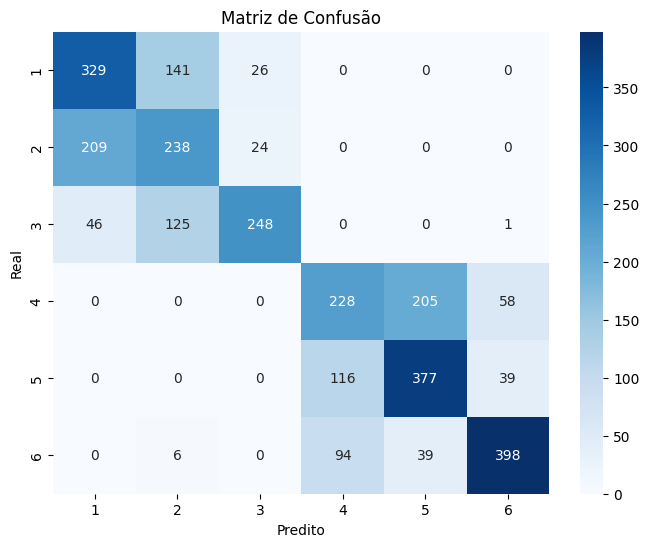

In [31]:
from sklearn.metrics import confusion_matrix

# Obter a melhor árvore de decisão
best_tree = tree_list[best_tree_index]

# Calcular a acurácia da melhor árvore nos dados de teste
test_predictions = best_tree.predict(X_test_selected)
best_test_accuracy = accuracy_score(y_test, test_predictions)

print(f"Acurácia da Melhor Árvore na Base de Teste: {best_test_accuracy:.4f}")

# Calcular a matriz de confusão
conf_matrix = confusion_matrix(y_test, test_predictions)

# Visualizar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap=plt.cm.Blues,
            xticklabels=["1", "2", "3", "4", "5", "6"],
            yticklabels=["1", "2", "3", "4", "5", "6"])
plt.title("Matriz de Confusão")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.show()


### 5. Melhorando a árvore

A melhor forma de se melhorar um algoritmo é colocando nele novas variáveis que agreguem valor. Podemos usar a força-bruta e ir colocando variáveis aleatoriamente - ou colocar todas e deixar rodando por um bom tempo - ou utilizar uma lógica eficiente e fazer uma seleção de variáveis.

- Observe que há classes mais fáceis e mais difíceis de se identificar
- Crie uma variável binária para uma das classes de maior erro
- Fala uma árvore de classificação bem simples para esta variável:
    - utilize ```mean_samples_leaf=20```
    - utilize ```max_depth=4```
    - coloque todas as variáveis
- Observe a importância das variáveis, e selecione as 3 com maior importância
- Rode novamente o algoritmo acima com as 3 novas variáveis e avalie a acurácia

# Como pedido no item 5.

In [41]:
# Criar a variável binária para a classe com maior erro
y_train_error_class_6 = (y_train == 6).astype(int)

# Criar o modelo de árvore de decisão simples
simple_tree_model = DecisionTreeClassifier(min_samples_leaf=20, max_depth=4, random_state=42)

# Ajustar o modelo aos dados de treinamento com a nova variável
simple_tree_model.fit(X_train_selected, y_train_error_class_6)

# Obter a importância das variáveis
variable_importances = simple_tree_model.feature_importances_

# Identificar os índices das 3 variáveis com maior importância
top_variable_indices = np.argsort(variable_importances)[-3:]

# Selecionar as 3 variáveis com maior importância
selected_features_top = X_train_selected[:, top_variable_indices]

# Criar o modelo de árvore de decisão com as 3 variáveis selecionadas
final_tree_model = DecisionTreeClassifier(min_samples_leaf=20, random_state=42)

# Ajustar o modelo aos dados de treinamento com as 3 variáveis
final_tree_model.fit(selected_features_top, y_train)

# Realizar as predições nos dados de teste usando as 3 variáveis
test_predictions_final = final_tree_model.predict(X_test_selected[:, top_variable_indices])

# Calcular a acurácia do modelo final
final_test_accuracy = accuracy_score(y_test, test_predictions_final)

# Imprimir a acurácia final
print(f"Acurácia do Modelo Final: {final_test_accuracy:.2f}")


Acurácia do Modelo Final: 0.67


# Melhorando um pouco mais fora dos parâmetros do item 5.

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Criar o modelo Random Forest
random_forest_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Ajustar o modelo aos dados de treinamento
random_forest_model.fit(X_train_selected, y_train.values.ravel())  # Correção aqui

# Realizar as predições nos dados de teste
test_predictions = random_forest_model.predict(X_test_selected)

# Calcular a acurácia do modelo
test_accuracy = accuracy_score(y_test, test_predictions)

# Imprimir a acurácia
print(f"Acurácia do Modelo: {test_accuracy:.2f}")


Acurácia do Modelo: 0.70
